In [3]:
import pandas as pd 
import seaborn as sns 
sns.set(style="whitegrid")
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

warnings.warn("This is a simple warning!")


/var/folders/12/87yq8_7n41v66hwpgnqglrc40000gn/T/ipykernel_1780/2204757355.py:10: UserWarning: This is a simple warning!
  warnings.warn("This is a simple warning!")


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
census_income = fetch_ucirepo(id=20) 

# data (as pandas dataframes) 
df = census_income.data.features 
df_target = census_income.data.targets 

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [6]:
df = pd.concat([df, df_target], axis=1)

In [7]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [8]:
df_copy = df

In [9]:
df_copy .head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [10]:
#df_copy["education"].unique()
#df_copy["marital-status"].unique()
#df_copy['occupation'].unique()
#df_copy["native-country"].unique()


In [11]:
df_copy.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [12]:
df_copy.dropna(inplace=True)
df_copy.isna().sum()
df_copy.shape


(47621, 15)

In [13]:
df_copy.duplicated().sum()
df_copy.shape
df_copy.drop_duplicates(inplace=True)
df_copy.shape



(47592, 15)

In [14]:
df_copy.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,47592.000000,4.759200e+04,47592.000000,47592.00000,47592.000000,47592.000000
mean,38.644541,1.897310e+05,10.091444,1091.80253,87.907022,40.602895
std,13.557307,1.055717e+05,2.567580,7489.46073,404.127864,12.259716
min,17.000000,1.228500e+04,1.000000,0.00000,0.000000,1.000000
25%,28.000000,1.175848e+05,9.000000,0.00000,0.000000,40.000000
50%,37.000000,1.782820e+05,10.000000,0.00000,0.000000,40.000000
75%,48.000000,2.377130e+05,12.000000,0.00000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.00000,4356.000000,99.000000


In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47592 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47592 non-null  int64 
 1   workclass       47592 non-null  object
 2   fnlwgt          47592 non-null  int64 
 3   education       47592 non-null  object
 4   education-num   47592 non-null  int64 
 5   marital-status  47592 non-null  object
 6   occupation      47592 non-null  object
 7   relationship    47592 non-null  object
 8   race            47592 non-null  object
 9   sex             47592 non-null  object
 10  capital-gain    47592 non-null  int64 
 11  capital-loss    47592 non-null  int64 
 12  hours-per-week  47592 non-null  int64 
 13  native-country  47592 non-null  object
 14  income          47592 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.8+ MB


In [16]:
df_copy = df_copy.replace("?",np.nan)
df_copy.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64

In [17]:
df_copy.dropna(inplace=True)

In [18]:
df_copy.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

df_copy.info()

In [19]:
#df_copy["income"].astype(float)
df_copy["income"].unique()



array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

ValueError: could not convert string to float: 'State-gov'

In [17]:
Category_columns = [i  for i in df_copy.columns if df_copy[i].dtypes == 'O']

In [ ]:
Category_columns = [i  for i in df_copy.columns if df_copy[i].dtypes == 'O']
Category_columns = ['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']



In [19]:
Category_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

# Now i will perform label encoding !!

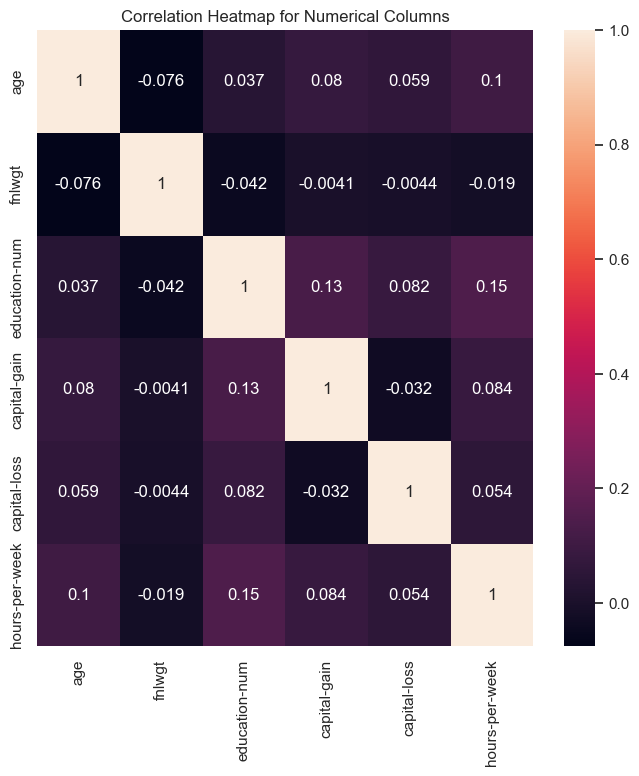

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df 

num_df = df_copy.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,8))
sns.heatmap(num_df.corr(), annot=True,)
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()
for col in Category_columns:
    df_copy[col] = encoder.fit_transform(df_copy[col])
    
df["income"].unique()
df_copy["income"] = df_copy["income"].str.replace('.', '', regex=False).str.strip()
encoder = LabelEncoder()
df_copy["income"] = encoder.fit_transform(df_copy["income"])

In [ ]:

encoder = LabelEncoder()
for col in Category_columns:
    df_copy[col] = encoder.fit_transform(df_copy[col])

In [22]:
df_copy.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,<=50K
5,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,<=50K
6,49,2,160187,6,5,3,7,1,2,0,0,0,16,22,<=50K
7,52,4,209642,11,9,2,3,0,4,1,0,0,45,38,>50K
8,31,2,45781,12,14,4,9,1,4,0,14084,0,50,38,>50K
9,42,2,159449,9,13,2,3,0,4,1,5178,0,40,38,>50K


In [23]:
df["income"].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [24]:
df_copy["income"] = df_copy["income"].str.replace('.', '', regex=False).str.strip()


In [25]:
df_copy["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [26]:
encoder = LabelEncoder()
df_copy["income"] = encoder.fit_transform(df_copy["income"])

In [27]:
df_copy["income"].unique()

array([0, 1])

In [28]:
x = df_copy.drop("income", axis=1)  
y = df_copy["income"]                

In [29]:
x.shape,y.shape

((45194, 14), (45194,))

In [30]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
x_train.shape,x_test.shape

((36155, 14), (9039, 14))

In [32]:
y_train.shape,y_test.shape

((36155,), (9039,))

In [33]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[ 0.94220699, -0.21281885, -1.58916796, ...,  4.46484299,
         1.58939967,  0.26203746],
       [-1.0984621 , -0.21281885, -1.13315941, ..., -0.22019959,
         0.755954  ,  0.26203746],
       [ 0.3375643 , -0.21281885, -0.63288815, ..., -0.22019959,
        -1.66103842,  0.09782974],
       ...,
       [-1.24962278, -0.21281885,  1.37992691, ..., -0.22019959,
        -1.74438299,  0.26203746],
       [-0.11591772, -0.21281885, -0.12112414, ..., -0.22019959,
         4.83983776,  0.26203746],
       [ 0.79104632, -0.21281885, -0.61678312, ..., -0.22019959,
        -0.07749166,  0.26203746]])

In [34]:
reg = LinearRegression()
reg.fit(x_train,y_train)
print(reg.coef_)
print(reg.intercept_)

[ 0.06651014 -0.01487535  0.00825292 -0.01110805  0.12158417 -0.03458571
  0.00482169 -0.02868245  0.01228462  0.04856985  0.06829299  0.04454749
  0.04208174 -0.00574959]
0.24740699764901122


In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)
print(reg.coef_)
print(reg.intercept_)
y_pred = reg.predict(x_test)
y_pred
y_pred_binary = (y_pred >= 0.5).astype(int)
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report

balanced_acc = balanced_accuracy_score(y_test, y_pred_binary)
acc = accuracy_score(y_test, y_pred_binary)
cm = confusion_matrix(y_test, y_pred_binary)

print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred_binary)
mea = mean_absolute_error(y_test,y_pred_binary)
rmse = np.sqrt(mse)
print(mse)
print(mea)
print(rmse)


array([ 0.16657769,  0.4373408 ,  0.16483053, ...,  0.43988827,
        0.46750206, -0.00915701])

# THRESHOLD INTIALISING

In [52]:
y_pred_binary = (y_pred >= 0.5).astype(int)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
reg = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_bal_acc = []
fold_conf_matrix = []
fold_class_report = []
for fold, (train_idx, test_idx) in enumerate(kf.split(x), 1):
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    # Threshold predictions
    y_pred_binary = (y_pred >= 0.5).astype(int)
    bal_acc = balanced_accuracy_score(y_test, y_pred_binary)
    cm = confusion_matrix(y_test, y_pred_binary)
    cr = classification_report(y_test, y_pred_binary)
    fold_bal_acc.append(bal_acc)
    fold_conf_matrix.append(cm)
    fold_class_report.append(cr)
    print(f"Fold {fold} Balanced Accuracy: {bal_acc:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", cr)
    print("-"*40)
print("Mean Balanced Accuracy:", np.mean(fold_bal_acc))


Fold 1 Balanced Accuracy: 0.6481
Confusion Matrix:
 [[6505  273]
 [1500  761]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      6778
           1       0.74      0.34      0.46      2261

    accuracy                           0.80      9039
   macro avg       0.77      0.65      0.67      9039
weighted avg       0.79      0.80      0.78      9039

----------------------------------------
Fold 2 Balanced Accuracy: 0.6549
Confusion Matrix:
 [[6609  247]
 [1428  755]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.89      6856
           1       0.75      0.35      0.47      2183

    accuracy                           0.81      9039
   macro avg       0.79      0.65      0.68      9039
weighted avg       0.81      0.81      0.79      9039

----------------------------------------
Fold 3 Balanced Accuracy: 0.6479
Confusion Matrix:
 [[6502

In [81]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
acc = accuracy_score(y_test, y_pred_binary)
cm = confusion_matrix(y_test, y_pred_binary)

print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))



Accuracy: 0.8004
Balanced Accuracy: 0.6481
Confusion Matrix:
 [[6457  291]
 [1513  777]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      6748
           1       0.73      0.34      0.46      2290

    accuracy                           0.80      9038
   macro avg       0.77      0.65      0.67      9038
weighted avg       0.79      0.80      0.77      9038



In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse = mean_squared_error(y_test,y_pred_binary)
mea = mean_absolute_error(y_test,y_pred_binary)
rmse = np.sqrt(mse)
print("Mean squared error:", mse)
print("Mean absolute error:", mea)
print("Root mean squared error:",rmse)

Mean squared error: 0.19615001659475606
Mean absolute error: 0.19615001659475606
Root mean squared error: 0.4428882664902696


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold ,cross_val_score
C_values = [0.01, 0.1, 1, 10, 100]
svm_results = {}
for c in C_values:
    print(f"\n Training Linear SVM with C = {c}")
    
    svm = LinearSVC(C=c, max_iter=10000, random_state=42)
    svm.fit(x_train, y_train)
    y_pred_svm = svm.predict(x_test)
    
    acc_svm = accuracy_score(y_test, y_pred_svm)
    balanced_acc_svm = balanced_accuracy_score(y_test, y_pred_svm)
    svm_results[c] = {
        "Accuracy": acc_svm,
        "Balanced Accuracy": balanced_acc_svm
    }
    print(f"Accuracy: {acc_svm:.4f}")
    print(f"Balanced Accuracy: {balanced_acc_svm:.4f}")
print("\n--- Summary of Results ---")
for c, metrics in svm_results.items():
    print(f"C = {c:<6} | Accuracy = {metrics['Accuracy']:.4f} | Balanced Accuracy = {metrics['Balanced Accuracy']:.4f}")    
print()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm_scores = cross_val_score(svm, x, y, cv=cv, scoring='balanced_accuracy')
print("Linear SVM CV Balanced Accuracy:", svm_scores.mean())




 Training Linear SVM with C = 0.01
Accuracy: 0.8177
Balanced Accuracy: 0.6852

 Training Linear SVM with C = 0.1
Accuracy: 0.8176
Balanced Accuracy: 0.6853

 Training Linear SVM with C = 1
Accuracy: 0.8175
Balanced Accuracy: 0.6851

 Training Linear SVM with C = 10
Accuracy: 0.8175
Balanced Accuracy: 0.6851

 Training Linear SVM with C = 100
Accuracy: 0.8175
Balanced Accuracy: 0.6851

--- Summary of Results ---
C = 0.01   | Accuracy = 0.8177 | Balanced Accuracy = 0.6852
C = 0.1    | Accuracy = 0.8176 | Balanced Accuracy = 0.6853
C = 1      | Accuracy = 0.8175 | Balanced Accuracy = 0.6851
C = 10     | Accuracy = 0.8175 | Balanced Accuracy = 0.6851
C = 100    | Accuracy = 0.8175 | Balanced Accuracy = 0.6851

Linear SVM CV Balanced Accuracy: 0.6223301850694094


In [65]:
print("\n--- Model Comparison ---")
print(f"Least Squares (threshold 0.5) Cross Validation  = 5:, Balanced Accuracy = {balanced_acc:.4f}")
print(f"Linear SVM: Balanced Accuracy Cross Validation  = 5:, Balanced Accuracy = {balanced_acc_svm:.4f}")



--- Model Comparison ---
Least Squares (threshold 0.5) Cross Validation  = 5:, Balanced Accuracy = 0.6481
Linear SVM: Balanced Accuracy Cross Validation  = 5:, Balanced Accuracy = 0.6851
